#Prepare The Dataset

In [1]:
%%capture
!pip install ipython-autotime
%load_ext autotime

time: 491 µs (started: 2025-05-22 15:34:06 +00:00)


In [2]:
import kagglehub
import pandas as pd
import os

time: 1.3 s (started: 2025-05-22 15:34:06 +00:00)


In [3]:
# Download the dataset
path = kagglehub.dataset_download("tobiasbueck/multilingual-customer-support-tickets")

# List the files in the dataset folder
print(os.listdir(path))


['dataset-tickets-multi-lang-4-20k.csv', 'dataset-tickets-multi-lang3-4k.csv', 'aa_dataset-tickets-multi-lang-5-2-50-version.csv']
time: 1.61 s (started: 2025-05-22 15:34:07 +00:00)


In [4]:
# Step 3: Load using pandas directly
file_path = os.path.join(path, "dataset-tickets-multi-lang-4-20k.csv")
df = pd.read_csv(file_path)

# Step 4: Preview
df.head()


,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


time: 1.34 s (started: 2025-05-22 15:34:09 +00:00)


In [5]:
df = df[df['language'] == 'en'].reset_index(drop=True)
print(f"English rows: {len(df)}")
df.head()

English rows: 11923


,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
1,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
2,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN
3,Concerns About Securing Medical Data on 2-in-1...,Inquiring about best practices for securing me...,Thank you for your concern regarding securing ...,Request,Technical Support,medium,en,Security,Product,Feature,IT,Tech Support,NaN,NaN,NaN
4,Problem with Integration,"The integration stopped working unexpectedly, ...",I will look into the problem and call you at <...,Problem,IT Support,high,en,Technical,Integration,Bug,Resolution,Outage,Documentation,NaN,NaN


time: 279 ms (started: 2025-05-22 15:34:10 +00:00)


In [6]:
from collections import defaultdict

tag_columns = [f"tag_{i}" for i in range(1, 9)]
tag_counts = defaultdict(int)

# Count occurrences of each tag across all tag columns
for col in tag_columns:
    for tag in df[col].dropna():
        tag_counts[tag] += 1

# Sort tags by count (descending)
sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

# Print tag and count
for tag, count in sorted_tags:
    print(f"{tag}: {count}")


Tech Support: 4847
IT: 4732
Documentation: 4232
Feedback: 3910
Performance: 3887
Bug: 3578
Technical: 3531
Security: 2791
Resolution: 2410
Feature: 2051
Guidance: 1874
Product: 1406
Network: 1092
Customer: 1067
Crash: 1050
Outage: 1020
Integration: 1006
Sales: 995
Disruption: 821
Billing: 816
Incident: 748
Breach: 615
Payment: 569
Maintenance: 558
Hardware: 510
Software: 468
Account: 455
Follow-Up: 455
Strategy: 350
Marketing: 349
Support: 348
Investigation: 316
Virus: 274
Analytics: 252
Training: 243
Login: 236
Alert: 232
Compliance: 226
Encryption: 218
Recovery: 218
Campaign: 197
Issue: 189
Medical: 177
Notification: 176
Communication: 173
Refund: 162
API: 158
Investment: 144
Update: 135
Assistance: 125
Database: 114
Compatibility: 114
Digital: 113
Server: 113
Synchronization: 106
Information: 101
Troubleshooting: 99
Growth: 97
Data: 96
Tool: 88
Dashboard: 85
Configuration: 82
Subscription: 81
Pricing: 80
Error: 80
Lead: 79
Collaboration: 77
Discussion: 73
Optimization: 69
Inquiry: 6

In [7]:
import pandas as pd

# Define the tags you want to keep
desired_tags = {"Tech Support", "Feedback", "Documentation", "Security", "Product", "Customer", "Sales"}

# All tag columns
tag_columns = [f"tag_{i}" for i in range(1, 9)]

# Step 1: Keep only rows that have at least one desired tag
mask = df[tag_columns].apply(lambda row: any(tag in desired_tags for tag in row if pd.notna(tag)), axis=1)
df = df[mask].reset_index(drop=True)

# Step 2: Remove tags that are not in the desired list
for col in tag_columns:
    df[col] = df[col].apply(lambda tag: tag if tag in desired_tags else pd.NA)


time: 317 ms (started: 2025-05-22 15:34:11 +00:00)


In [8]:
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,<NA>,Tech Support,<NA>,<NA>,<NA>,<NA>
1,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,<NA>,Product,<NA>,Documentation,<NA>,<NA>,<NA>,<NA>
2,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,<NA>,<NA>,Documentation,<NA>,<NA>,<NA>
3,Concerns About Securing Medical Data on 2-in-1...,Inquiring about best practices for securing me...,Thank you for your concern regarding securing ...,Request,Technical Support,medium,en,Security,Product,<NA>,<NA>,Tech Support,<NA>,<NA>,<NA>
4,Problem with Integration,"The integration stopped working unexpectedly, ...",I will look into the problem and call you at <...,Problem,IT Support,high,en,<NA>,<NA>,<NA>,<NA>,<NA>,Documentation,<NA>,<NA>


time: 270 ms (started: 2025-05-22 15:34:11 +00:00)


In [9]:
from collections import Counter

# Step 1: Combine all tag columns per row
tag_cols = [f'tag_{i}' for i in range(1, 9)]
df['tag_list'] = df[tag_cols].values.tolist()
df['tag_list'] = df['tag_list'].apply(lambda tags: [t for t in tags if pd.notna(t)])

# Step 2: Count total tag frequency across dataset
all_tags = [tag for tags in df['tag_list'] for tag in tags]
tag_freq = Counter(all_tags)

# Step 3: Pick most frequent tag *in each row*, based on overall frequency
# Pick least frequent tag per row
def least_frequent_tag(tags):
    return min(tags, key=lambda t: tag_freq[t]) if tags else np.nan

df['label_tag'] = df['tag_list'].apply(least_frequent_tag)

# Step 4: Drop rows where no tag remains
df = df[df['label_tag'].notna()].reset_index(drop=True)

# Step 5: Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label_tag'])
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_list,label_tag,label
0,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,<NA>,Tech Support,<NA>,<NA>,<NA>,<NA>,"[Feedback, Sales, Tech Support]",Sales,4
1,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,<NA>,Product,<NA>,Documentation,<NA>,<NA>,<NA>,<NA>,"[Product, Documentation]",Product,3
2,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,<NA>,<NA>,Documentation,<NA>,<NA>,<NA>,"[Security, Customer, Documentation]",Customer,0
3,Concerns About Securing Medical Data on 2-in-1...,Inquiring about best practices for securing me...,Thank you for your concern regarding securing ...,Request,Technical Support,medium,en,Security,Product,<NA>,<NA>,Tech Support,<NA>,<NA>,<NA>,"[Security, Product, Tech Support]",Product,3
4,Problem with Integration,"The integration stopped working unexpectedly, ...",I will look into the problem and call you at <...,Problem,IT Support,high,en,<NA>,<NA>,<NA>,<NA>,<NA>,Documentation,<NA>,<NA>,[Documentation],Documentation,1


time: 1.77 s (started: 2025-05-22 15:34:11 +00:00)


label_tag
Security         2618
Tech Support     1913
Feedback         1781
Documentation    1232
Customer         1022
Product          1010
Sales             995
Name: count, dtype: int64


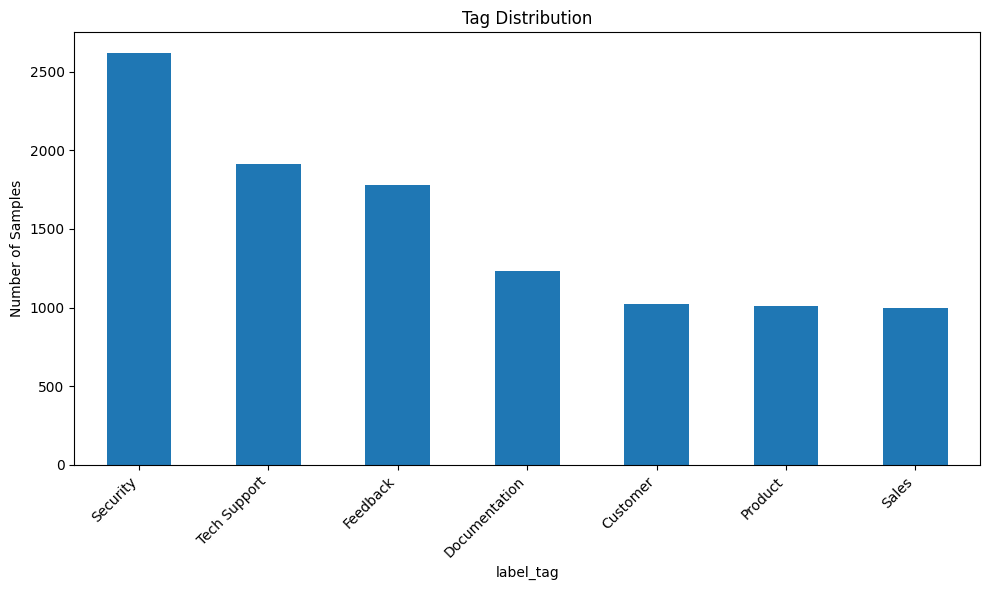

time: 431 ms (started: 2025-05-22 15:34:13 +00:00)


In [10]:
print(df['label_tag'].value_counts())
import matplotlib.pyplot as plt

df['label_tag'].value_counts().plot(kind='bar', figsize=(10,6), title='Tag Distribution')
plt.ylabel("Number of Samples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# Limit each class to at most 995 samples
df_balanced = df.groupby('label_tag', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 995), random_state=42)).reset_index(drop=True)
df = df_balanced  # overwrite for rest of pipeline

time: 84.8 ms (started: 2025-05-22 15:34:13 +00:00)


<ipython-input-11-d53097314803>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('label_tag', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 995), random_state=42)).reset_index(drop=True)


label_tag
Customer         995
Documentation    995
Feedback         995
Product          995
Sales            995
Security         995
Tech Support     995
Name: count, dtype: int64


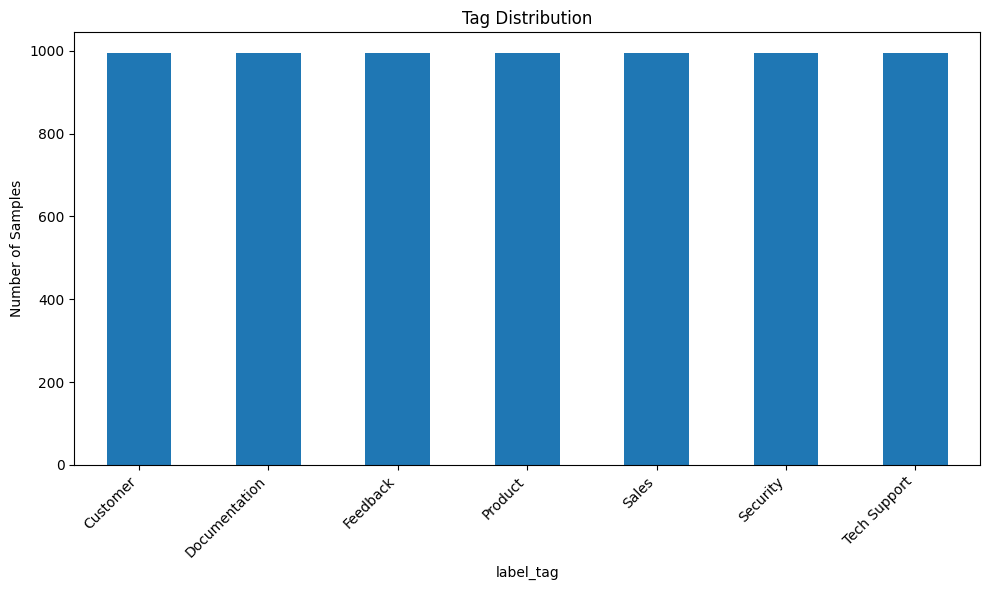

time: 444 ms (started: 2025-05-22 15:34:14 +00:00)


In [12]:
print(df['label_tag'].value_counts())
import matplotlib.pyplot as plt

df['label_tag'].value_counts().plot(kind='bar', figsize=(10,6), title='Tag Distribution')
plt.ylabel("Number of Samples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Download

In [13]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

time: 19.8 s (started: 2025-05-22 15:34:14 +00:00)


#Encoding

In [14]:
df['text'] = df['subject'].astype(str) + ' ' + df['body'].astype(str)

time: 14.2 ms (started: 2025-05-22 15:34:34 +00:00)


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label_tag'])  # ← changed here

# Save mapping for decoding predictions later
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'Customer': np.int64(0), 'Documentation': np.int64(1), 'Feedback': np.int64(2), 'Product': np.int64(3), 'Sales': np.int64(4), 'Security': np.int64(5), 'Tech Support': np.int64(6)}
time: 13.4 ms (started: 2025-05-22 15:34:34 +00:00)


#Split

In [16]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

time: 62.9 ms (started: 2025-05-22 15:34:34 +00:00)


#Tokenize

In [17]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=256)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


time: 26 s (started: 2025-05-22 15:34:34 +00:00)


#Dataset Class

In [18]:
import torch
from torch.utils.data import Dataset

class EmailDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings  # tokenizer outputs
        self.labels = labels        # your numeric labels from LabelEncoder

    def __len__(self):
        return len(self.labels)  # how many samples in total

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

time: 1.2 ms (started: 2025-05-22 15:35:00 +00:00)


In [19]:
train_dataset = EmailDataset(train_encodings, train_labels)
val_dataset = EmailDataset(val_encodings, val_labels)

time: 586 µs (started: 2025-05-22 15:35:00 +00:00)


#Bert

In [20]:
!pip install -U transformers

time: 4.14 s (started: 2025-05-22 15:35:00 +00:00)


In [21]:
from transformers import BertForSequenceClassification

num_labels = len(label_encoder.classes_)  # should match your 7 selected tags

# model = BertForSequenceClassification.from_pretrained(
#     'bert-base-uncased',
#     num_labels=num_labels
# )

from transformers import BertConfig, BertForSequenceClassification

config = BertConfig.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels,
    hidden_dropout_prob=0.3,              # ⬅️ Increase dropout
    attention_probs_dropout_prob=0.3      # ⬅️ Dropout in attention layers
)

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    config=config
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


time: 120 ms (started: 2025-05-22 15:35:04 +00:00)


In [22]:
from transformers import BertForSequenceClassification
import torch
from torch.optim import AdamW

# Define number of labels from your label encoder
num_labels = len(label_encoder.classes_)

# Load model
# model = BertForSequenceClassification.from_pretrained(
#     'bert-base-uncased',
#     num_labels=num_labels
# )

config = BertConfig.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels,
    hidden_dropout_prob=0.4,              # ⬅️ Increase dropout
    attention_probs_dropout_prob=0.4      # ⬅️ Dropout in attention layers
)

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    config=config
)

# Move model to device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


time: 186 ms (started: 2025-05-22 15:35:04 +00:00)


In [23]:
from torch.utils.data import DataLoader

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

time: 1.24 ms (started: 2025-05-22 15:35:05 +00:00)


In [24]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Compute weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define weighted loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor, label_smoothing=0.1)


time: 4.11 ms (started: 2025-05-22 15:35:05 +00:00)


In [25]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(8):  # Adjust number of epochs if needed
    print(f"\n🔁 Epoch {epoch + 1}")

    # === TRAINING ===
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)  # ✅ using class-weighted loss
        train_loss += loss.item()

        preds = outputs.logits.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loss.backward()
        optimizer.step()

    train_acc = correct / total
    avg_train_loss = train_loss / len(train_loader)

    # === VALIDATION ===
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs.logits, labels)
            val_loss += loss.item()

            preds = outputs.logits.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    avg_val_loss = val_loss / len(val_loader)

    print(f"✅ Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"🧪 Val   Loss: {avg_val_loss:.4f} | Val   Acc: {val_acc:.4f}")



🔁 Epoch 1


  2%|▏         | 6/349 [05:49<5:33:25, 58.33s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-946d4a274812>", line 30, in <cell line: 0>
    loss.backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3

TypeError: object of type 'NoneType' has no len()

time: 5min 50s (started: 2025-05-22 15:35:05 +00:00)


#Metrics

In [ ]:
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [ ]:
from sklearn.metrics import classification_report

# Get label IDs sorted as they appear in label_encoder
label_ids = list(range(len(label_encoder.classes_)))
target_names = label_encoder.inverse_transform(label_ids)

# Print report
print(classification_report(all_labels, all_preds, target_names=target_names))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
df[['subject', 'body', 'tag_list', 'label_tag']].to_csv('labeled_dataset_for_review.csv', index=False)
from google.colab import files
files.download('labeled_dataset_for_review.csv')
